#### Spatial Disaggregation
-Pull population data in for one district  
-disaggregate it into each sector for that district

In [1]:
#import packages for shapefile handling and plotting
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
#import MCDM package for building weighted overlay
#from mcdm import Mcdm

##### Link to article discussing spatial disaggregation techniques:
#### https://link.springer.com/article/10.1007/s12145-021-00737-9

In [28]:
#read in district-level shapefile
rwanda_00 = gpd.read_file(
  "./rwanda_admin_boundaries/rwa_adm0_2006_NISR_WGS1984_20181002.shp")

In [29]:
#read in district-level shapefile
rwanda_02 = gpd.read_file(
  "./rwanda_admin_boundaries/rwa_adm2_2006_NISR_WGS1984_20181002.shp")

In [30]:
#read in sector-level shapefile
rwanda_03 = gpd.read_file(
  "./rwanda_admin_boundaries/rwa_adm3_2006_NISR_WGS1984_20181002.shp")

In [31]:
#read in district-level population data
pop_data = pd.read_csv("./rw_population_data.csv", index_col=None)

result = pop_data.dtypes

print(pop_data)
print("Types: ")
print(result)

    Key ADM2_PCODE    District  Tot_Count  Urban_Count  Rural_Count
0     1       RW57    Bugesera     361914        28786       333128
1     2       RW44      Burera     336582         6205       330377
2     3       RW42     Gakenke     338234         9347       328887
3     4       RW12      Gasabo     529561       365371       164190
4     5       RW53     Gatsibo     433020        23914       409106
5     6       RW45     Gicumbi     395606        34544       361062
6     7       RW22    Gisagara     322506         5011       317495
7     8       RW24        Huye     328398        52768       275630
8     9       RW28     Kamonyi     340501        39035       301466
9    10       RW31     Karongi     331808        22756       309052
10   11       RW54     Kayonza     344157        34008       310149
11   12       RW13    Kicukiro     318564       279941        38623
12   13       RW55      Kirehe     340368        10083       330285
13   14       RW27     Muhanga     319141       

In [32]:
#print the district-level data types
rwanda_02.head()
print(rwanda_02.dtypes)

ADM0_EN         object
ADM0_FR         object
ADM0_RW         object
ADM0_SW         object
ADM0_PCODE      object
ADM1_EN         object
ADM1_FR         object
ADM1_RW         object
ADM1_PCODE      object
ADM2_EN         object
ADM2_PCODE      object
geometry      geometry
dtype: object


In [21]:
#Join population data to shapefile
rwanda_02 = rwanda_02.merge(pop_data, on="ADM2_PCODE")

rwanda_02.head(5)

ADM0_EN      ADM0_FR   ADM0_RW ADM0_SW ADM0_PCODE           ADM1_EN  \
0  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
1  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
2  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
3  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
4  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   

             ADM1_FR        ADM1_RW ADM1_PCODE   ADM2_EN ADM2_PCODE  \
0  Province de l'Est  Iburasirazuba        RW5  Bugesera       RW57   
1  Province de l'Est  Iburasirazuba        RW5   Gatsibo       RW53   
2  Province de l'Est  Iburasirazuba        RW5   Kayonza       RW54   
3  Province de l'Est  Iburasirazuba        RW5    Kirehe       RW55   
4  Province de l'Est  Iburasirazuba        RW5     Ngoma       RW56   

                                            geometry  Key  District  \
0  POLYGON ((30.17503 -2.03129, 30.17518 -2.03189...    1  Bugesera   
1  POLYGON ((30.74056 -1.47605, 30.74135 -1.48512...    5   Gatsibo   
2  POLYGON ((30.83790 -1.65576, 30.83397 -1.66461...   11   Kayonza   
3  POLYGON ((30.83586 -1.98491, 30.83657 -1.98604...   13    Kirehe   
4  POLYGON ((30.51618 -2.05865, 30.51627 -2.05873...   16     Ngoma   

   Tot_Count  Urban_Count  Rural_Count  
0     361914        28786       333128  
1     433020        23914       409106  
2     344157        34008       310149  
3     340368        10083       330285  
4     336928        15236       321692

In [24]:
#pull kirehe district's sectors for mapping
kirehe = rwanda_03.loc[rwanda_03['ADM2_PCODE'] == "RW55"]

kirehe.head()

ADM0_EN      ADM0_FR   ADM0_RW ADM0_SW ADM0_PCODE           ADM1_EN  \
375  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
376  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
377  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
378  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
379  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   

               ADM1_FR        ADM1_RW ADM1_PCODE ADM2_EN ADM2_PCODE   ADM3_EN  \
375  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Gahara   
376  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Gatore   
377  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55  Kigarama   
378  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Kigina   
379  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Kirehe   

    ADM3_PCODE ADM3ALT1EN                                           geometry  
375     RW5501       None  POLYGON ((30.55720 -2.29243, 30.55801 -2.29320...  
376     RW5502       None  POLYGON ((30.58855 -2.26377, 30.58940 -2.26442...  
377     RW5503       None  POLYGON ((30.72631 -2.28707, 30.72652 -2.28737...  
378     RW5504       None  POLYGON ((30.71149 -2.21912, 30.71223 -2.21941...  
379     RW5505       None  POLYGON ((30.66219 -2.23013, 30.66279 -2.23105...

In [48]:
#index key for join


In [44]:
#Calculate the area of each sector using geopandas
kirehe_sector_area = kirehe['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

C:\Users\Home\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [45]:
#print area in km^2 for each sector
print(kirehe_sector_area)

375    106.518130
376     64.083782
377    115.896976
378     66.983782
379     49.198373
380     64.847241
381    248.936003
382     91.572344
383     95.061960
384    103.273408
385     98.093330
386     86.039775
Name: geometry, dtype: float64


In [50]:
#Pull population total for Kirehe district

#total population
kirehe_pop_data = pop_data.loc[pop_data['ADM2_PCODE'] == "RW55"]
kirehe_tot_pop = kirehe_pop_data['Tot_Count']

print("Kirehe total population data: ")
print(kirehe_pop_data)


Kirehe total population data: 
    Key ADM2_PCODE District  Tot_Count  Urban_Count  Rural_Count
12   13       RW55   Kirehe     340368        10083       330285


In [58]:
#add area to shapefile, rename columns
kirehe_areas = kirehe.merge(kirehe_sector_area, left_index=True, right_index=True)

kirehe_areas. rename(columns = {'geometry_x':'geometry', 'geometry_y':'area'}, inplace = True)

print("Areas added to shapefile: ")
kirehe_areas.head(2)

Areas added to shapefile: 


ADM0_EN      ADM0_FR   ADM0_RW ADM0_SW ADM0_PCODE           ADM1_EN  \
375  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
376  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   

               ADM1_FR        ADM1_RW ADM1_PCODE ADM2_EN ADM2_PCODE ADM3_EN  \
375  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55  Gahara   
376  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55  Gatore   

    ADM3_PCODE ADM3ALT1EN                                           geometry  \
375     RW5501       None  POLYGON ((30.55720 -2.29243, 30.55801 -2.29320...   
376     RW5502       None  POLYGON ((30.58855 -2.26377, 30.58940 -2.26442...   

           area  
375  106.518130  
376   64.083782

In [61]:
#Weight population using land Area, and add result to data

total = kirehe_areas["area"].sum()
pop_kirehe = kirehe_pop_data["Tot_Count"].sum()

print(total)
print(pop_kirehe)

#calculate percent of area in each sector, multiply by population to get sector pop
#a = sector area; b=total area; c=total population
def sectorPop(a, b, c):
    return (a/b)*c

kirehe_areas['pop_disagg'] = kirehe_areas.apply(lambda row : sectorPop(row['area'], total, pop_kirehe), axis=1)

print('\nAfter Applying FX')
kirehe_areas.head()


1190.5051020461794
340368

After Applying FX


ADM0_EN      ADM0_FR   ADM0_RW ADM0_SW ADM0_PCODE           ADM1_EN  \
375  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
376  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
377  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
378  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   
379  Rwanda  Rwanda (le)  U Rwanda  Rwanda         RW  Eastern Province   

               ADM1_FR        ADM1_RW ADM1_PCODE ADM2_EN ADM2_PCODE   ADM3_EN  \
375  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Gahara   
376  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Gatore   
377  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55  Kigarama   
378  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Kigina   
379  Province de l'Est  Iburasirazuba        RW5  Kirehe       RW55    Kirehe   

    ADM3_PCODE ADM3ALT1EN                                           geometry  \
375     RW5501       None  POLYGON ((30.55720 -2.29243, 30.55801 -2.29320...   
376     RW5502       None  POLYGON ((30.58855 -2.26377, 30.58940 -2.26442...   
377     RW5503       None  POLYGON ((30.72631 -2.28707, 30.72652 -2.28737...   
378     RW5504       None  POLYGON ((30.71149 -2.21912, 30.71223 -2.21941...   
379     RW5505       None  POLYGON ((30.66219 -2.23013, 30.66279 -2.23105...   

           area    pop_disagg  
375  106.518130  30453.765176  
376   64.083782  18321.692696  
377  115.896976  33135.197590  
378   66.983782  19150.809005  
379   49.198373  14065.921862

<AxesSubplot:>

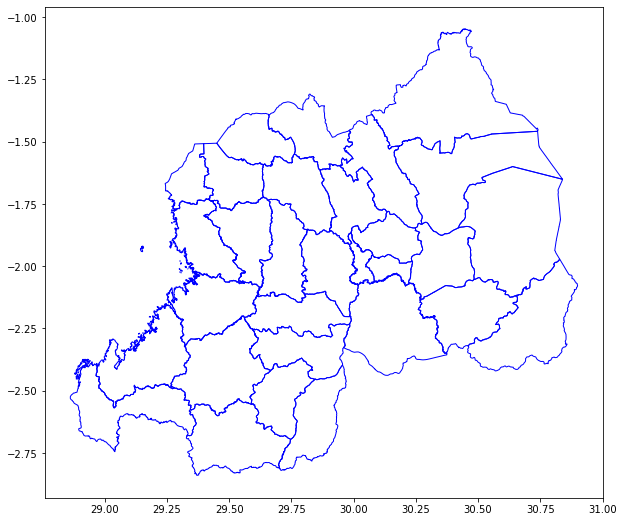

In [11]:
#plot districts
rwanda_02.plot(figsize=(10,10), edgecolor="blue", facecolor="none")

<AxesSubplot:>

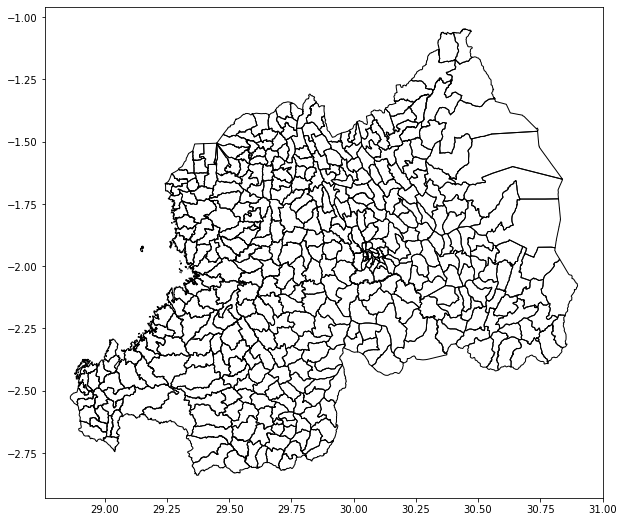

In [12]:
#plot sectors
rwanda_03.plot(figsize=(10,10), edgecolor="black", facecolor="none")

<AxesSubplot:>

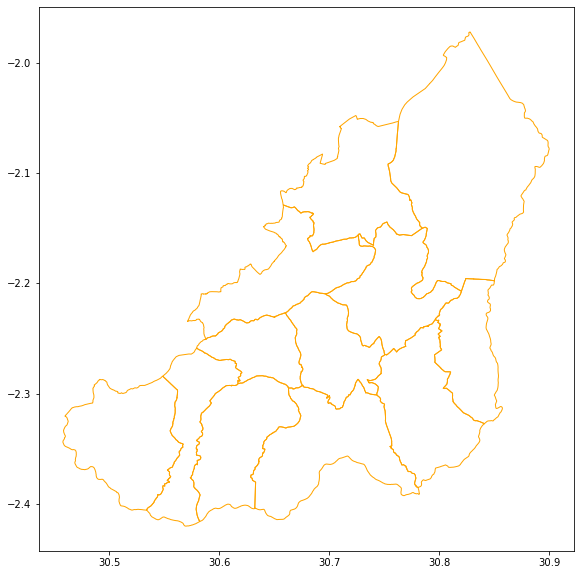

In [25]:
#plot Kirehe district sectors
kirehe.plot(figsize=(10,10), edgecolor="orange", facecolor="none")

<AxesSubplot:>

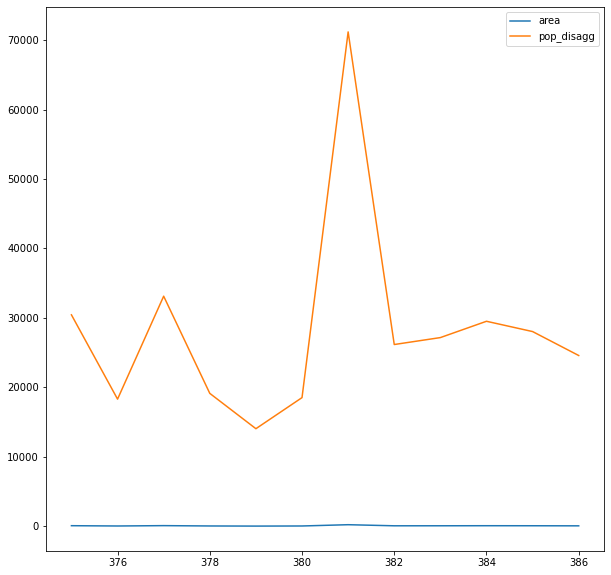

In [63]:
kirehe_areas.plot(figsize=(10,10), column="pop_disagg")

In [15]:
#Calculate the country area to check the operation for accuracy
country_area = rwanda_00['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

C:\Users\Home\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [16]:
#Country area should be about 26,000 km^2
print(country_area)

0    24336.689829
Name: geometry, dtype: float64
